In [1]:
import json
import seaborn as sns

In [2]:
with open('fall.json') as fall:
    fall = json.load(fall)
with open('spring.json') as spring:
    spring = json.load(spring)

In [3]:
data = {}

In [4]:
data.update(fall)

In [5]:
data.update(spring)

In [6]:
data['18.404']

{'no': '18.404',
 'co': '18',
 'cl': '404',
 'tb': False,
 's': ['r', 'l'],
 'l': [[[[43, 3], [103, 3]], '54-100']],
 'r': [[[[128, 2]], '36-144'],
  [[[126, 2]], '26-322'],
  [[[132, 2]], '36-144'],
  [[[130, 2]], '36-144'],
  [[[124, 2]], '26-322']],
 'b': [],
 'lr': ['TR2.30-4'],
 'rr': ['F12', 'F11', 'F2', 'F1', 'F10'],
 'br': [],
 'hh': False,
 'ha': False,
 'hs': False,
 'he': False,
 'ci': False,
 'cw': False,
 're': False,
 'la': False,
 'pl': False,
 'u1': 4,
 'u2': 0,
 'u3': 8,
 'le': 'U',
 'sa': '',
 'mw': '6.840, 18.4041',
 't': ['FA'],
 'pr': '6.042 or 18.200',
 'd': 'A more extensive and theoretical treatment of the material in 6.045J/18.400J, emphasizing computability and computational complexity theory. Regular and context-free languages. Decidable and undecidable problems, reducibility, recursive function theory. Time and space measures on computation, completeness, hierarchy theorems, inherently complex problems, oracles, probabilistic computation, and interactive pro

In [7]:
clean = [{'name': k, 'number': data[k]['no'], 'rating': data[k]['ra'], 'students': data[k]['si'], 'name': data[k]['n'], 'units': data[k]['u1'] + data[k]['u2'] + data[k]['u3'], 'major': data[k]['co']} for k in data.keys()] #sorted(data.keys(), key=lambda x: data[x]['si'], reverse=True)]

In [8]:
new_clean = []
for subject in clean:
    if (subject['name'] not in [k['name'] for k in new_clean]) and subject['students'] > 0 and subject['units'] >= 12:
        new_clean.append(subject)

In [9]:
clean = new_clean

In [10]:
# https://www.algolia.com/doc/guides/solutions/ecommerce/relevance-optimization/tutorials/bayesian-average/

In [11]:
c=sorted(clean, key=lambda x: x['students'])[len(clean)//4]['students']

In [12]:
total_ratings = sum([x['students'] for x in clean])

In [13]:
average_rating = sum([x['rating']*x['students'] for x in clean])/total_ratings

In [14]:
average_rating

5.817570423309168

In [15]:
def bayes(subject):
    return (subject['students'] * subject['rating'] + c * average_rating) / (subject['students'] + c)

In [22]:
[print(f"{x['number']}: {x['name']}") for x in sorted(clean, key=bayes, reverse=True)[:70] if '21G' not in x['number']]

11.011: The Art and Science of Negotiation
11.111: Leadership in Negotiation: Advanced Applications
18.404: Theory of Computation
17.317: US Social Policy
6.334: Power Electronics
21W.762: Poetry Workshop
6.08: Introduction to EECS via Interconnected Embedded Systems
21L.487: Modern Poetry
21M.385: Interactive Music Systems
24.917: ConLangs: How to Construct a Language
21M.294: Popular Musics of the World
6.332: Advanced Topics in Circuits
6.815: Digital and Computational Photography
6.865: Advanced Computational Photography
18.510: Introduction to Mathematical Logic and Set Theory
18.118: Topics in Analysis
21M.301: Harmony and Counterpoint I
21M.623: Physical Improvisation: Bodies in Motion
21L.601: Old English and Beowulf
14.13: Psychology and Economics
11.352: Real Estate Ventures II: Negotiating Leases, Financings, and Restructurings
21L.480: Identities and Intersections: Queer Literatures
21M.387: Fundamentals of Music Processing
6.341: Discrete-Time Signal Processing
CMS.608: Ga

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
[x for x in clean if "Spanish" in x['name']]

[{'name': 'Introductory Spanish for Heritage Learners',
  'number': '21G.700',
  'rating': 6.1,
  'students': 9,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish I',
  'number': '21G.701',
  'rating': 6.5,
  'students': 22.3,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish II',
  'number': '21G.702',
  'rating': 6.6,
  'students': 25.1,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish III',
  'number': '21G.703',
  'rating': 6.3,
  'students': 26.4,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish IV',
  'number': '21G.704',
  'rating': 6.5,
  'students': 36,
  'units': 12,
  'major': '21G'},
 {'name': 'Advanced Spanish Conversation and Composition: Perspectives on Technology and Culture',
  'number': '21G.711',
  'rating': 6.7,
  'students': 11.7,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish through Film: Mexico, Chile, Argentina, and Spain',
  'number': '21G.713',
  'rating': 6.7,
  'students': 11.8,
  'units': 12,
  'major': '21G'},
 {'name': 'Spanish for He

In [16]:
sorted([x for x in clean if x['major'] == '18'], key=bayes, reverse=True)

[{'name': 'Theory of Computation',
  'rating': 6.7,
  'students': 183.7,
  'units': 12,
  'major': '18'},
 {'name': 'Introduction to Mathematical Logic and Set Theory',
  'rating': 6.8,
  'students': 24,
  'units': 12,
  'major': '18'},
 {'name': 'Topics in Analysis',
  'rating': 7,
  'students': 14,
  'units': 12,
  'major': '18'},
 {'name': 'Geometry and Topology in the Plane',
  'rating': 6.8,
  'students': 17.5,
  'units': 12,
  'major': '18'},
 {'name': 'Mathematical Methods in Nanophotonics',
  'rating': 6.8,
  'students': 15,
  'units': 12,
  'major': '18'},
 {'name': 'Lie Groups and Lie Algebras II',
  'rating': 6.8,
  'students': 15,
  'units': 12,
  'major': '18'},
 {'name': 'Graduate Topology Seminar',
  'rating': 7,
  'students': 9,
  'units': 12,
  'major': '18'},
 {'name': 'Combinatorial Theory',
  'rating': 6.6,
  'students': 21.3,
  'units': 12,
  'major': '18'},
 {'name': 'Advanced Complexity Theory',
  'rating': 6.5,
  'students': 31.7,
  'units': 12,
  'major': '18'}

In [189]:
[x.update({'bayes': bayes(x)}) for x in clean]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [190]:
len(clean)

1141

In [191]:
b = [[bayes(x), x['students']] for x in clean]

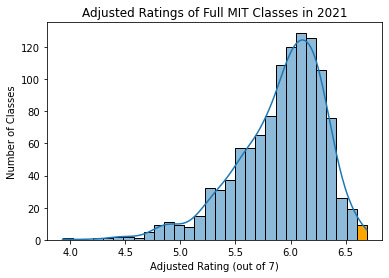

In [195]:
p = sns.histplot([bayes(x) for x in clean], kde=True, bins=30)
p.set_title('Adjusted Ratings of Full MIT Classes in 2021')
p.set_xlabel('Adjusted Rating (out of 7)')
p.set_ylabel('Number of Classes')

h = max([x.get_x() for x in p.patches])
for p in p.patches:
    if p.get_x() == h:
        p.set_facecolor('orange')

Text(0.5, 1.0, 'Ratings of MIT Classes')

Text(17.200000000000003, 0.5, 'Number of Classes')

In [154]:
p

<AxesSubplot:title={'center':'Ratings of MIT Classes'}, xlabel='Bayesian Rating', ylabel='Number of Classes'>

In [ ]:
sns.displot

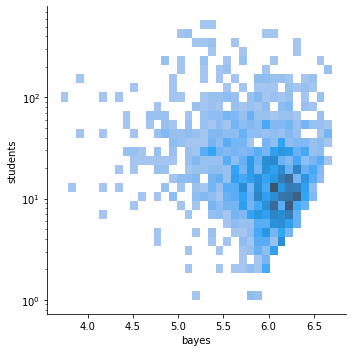

In [149]:
sns.displot({'bayes': [x['bayes'] for x in clean], 'students': [x['students'] for x in clean]}, x='bayes', y='students', log_scale=(False, True))